In [103]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings('ignore')




Monthly (CSV) Data set represents Average Price of Gold for each given month

In [3]:
df = pd.read_csv('monthly.csv')
df.head()


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.shape

(847, 2)

In [5]:
print(f"Date range of gold prices available from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from 1950-01 to 2020-07


In [6]:
date = pd.date_range (start='1/1/1950',end= '8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [7]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df = df.set_index('month')
df.head

<bound method NDFrame.head of                Price
month               
1950-01-31    34.730
1950-02-28    34.730
1950-03-31    34.730
1950-04-30    34.730
1950-05-31    34.730
...              ...
2020-03-31  1593.764
2020-04-30  1680.030
2020-05-31  1715.697
2020-06-30  1734.032
2020-07-31  1840.807

[847 rows x 1 columns]>

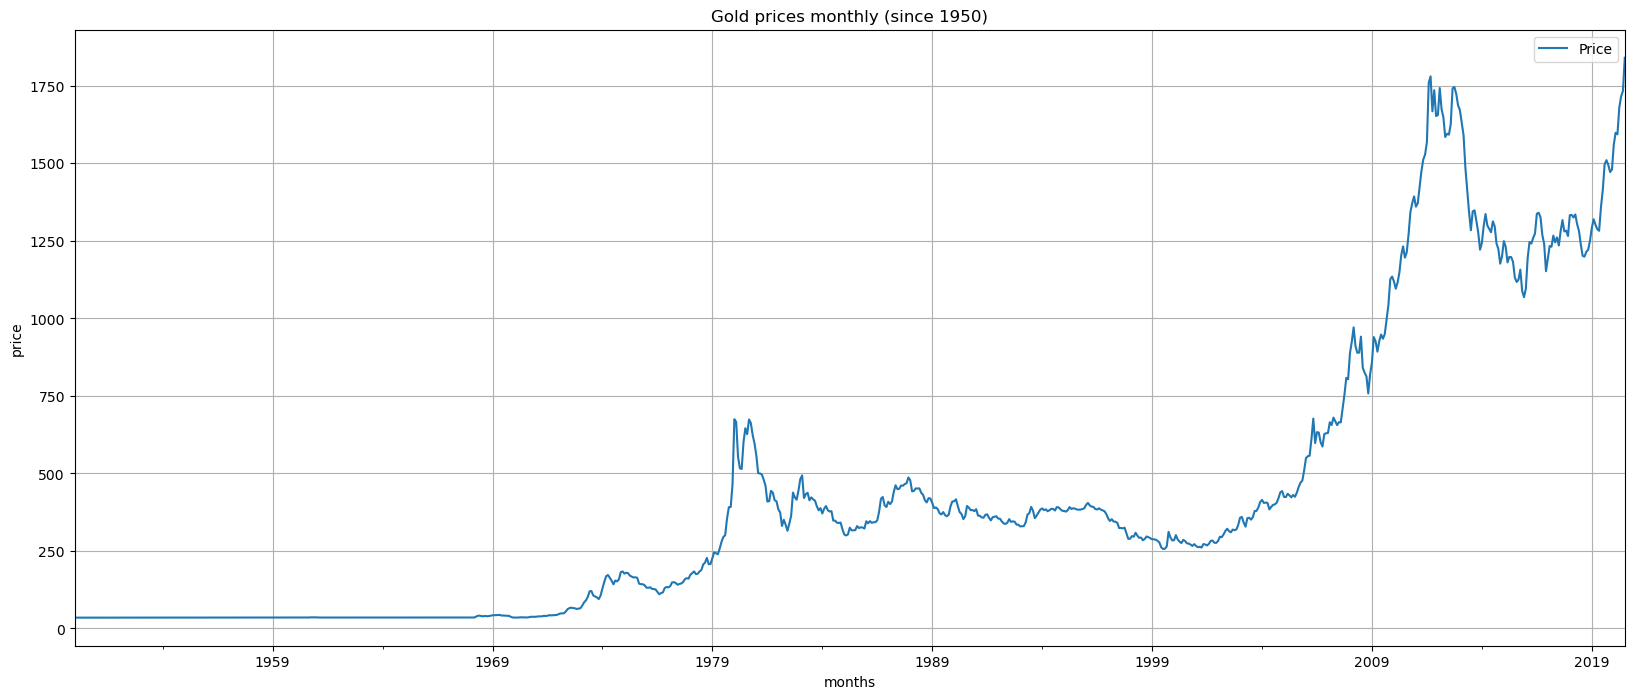

In [8]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly (since 1950)")
plt.xlabel("months")
plt.ylabel("price")
plt.grid()

In [9]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


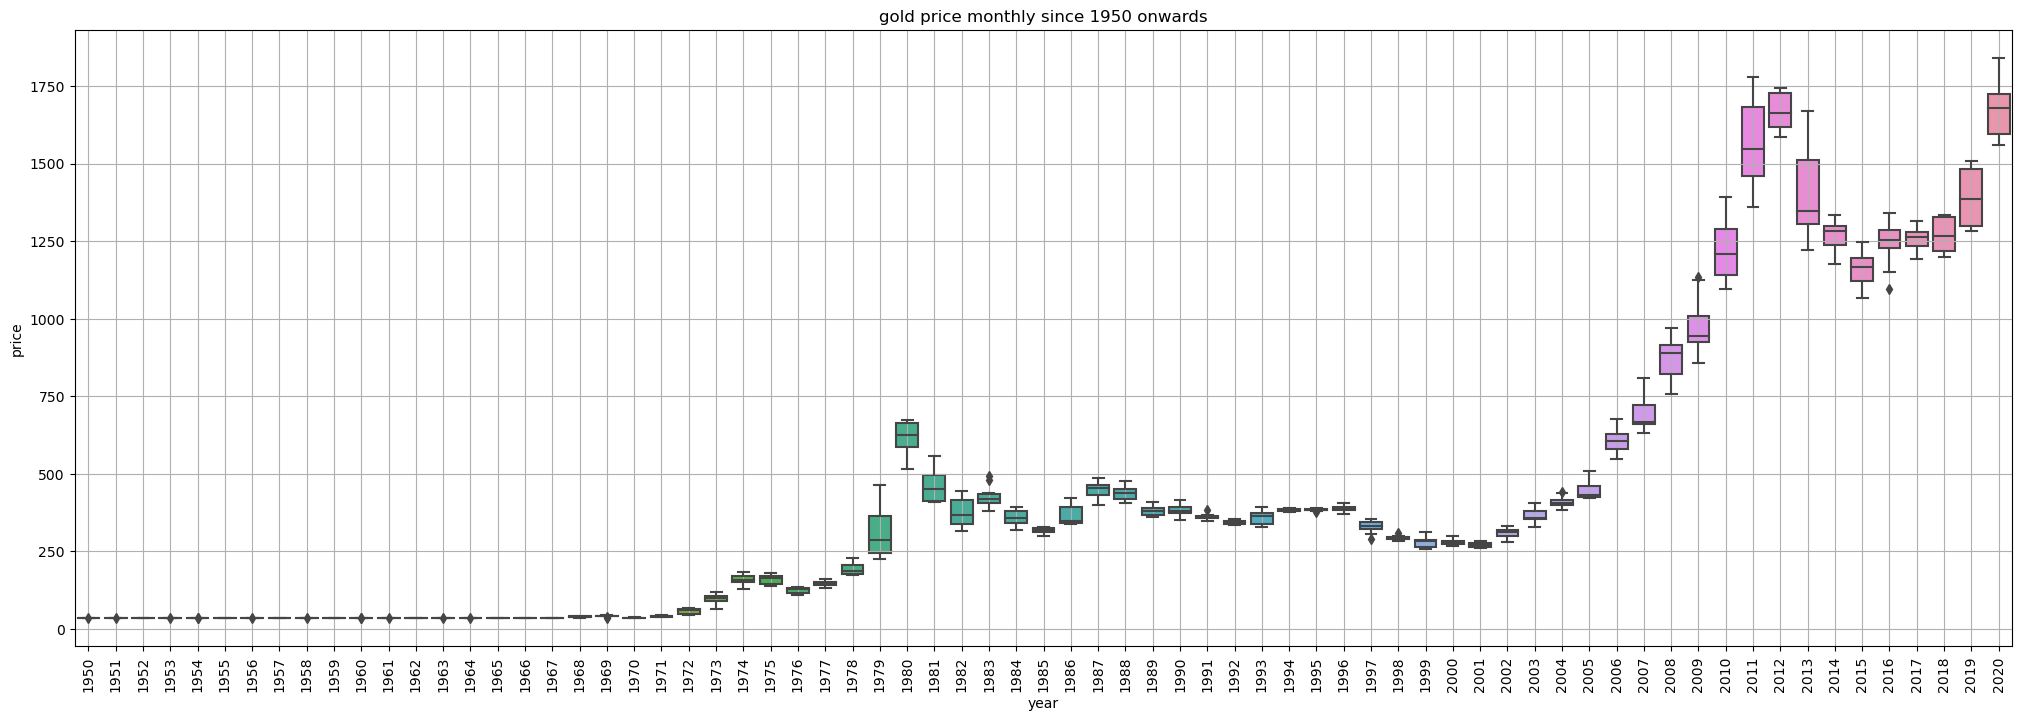

In [10]:
_, ax = plt.subplots(figsize = (25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0],ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()

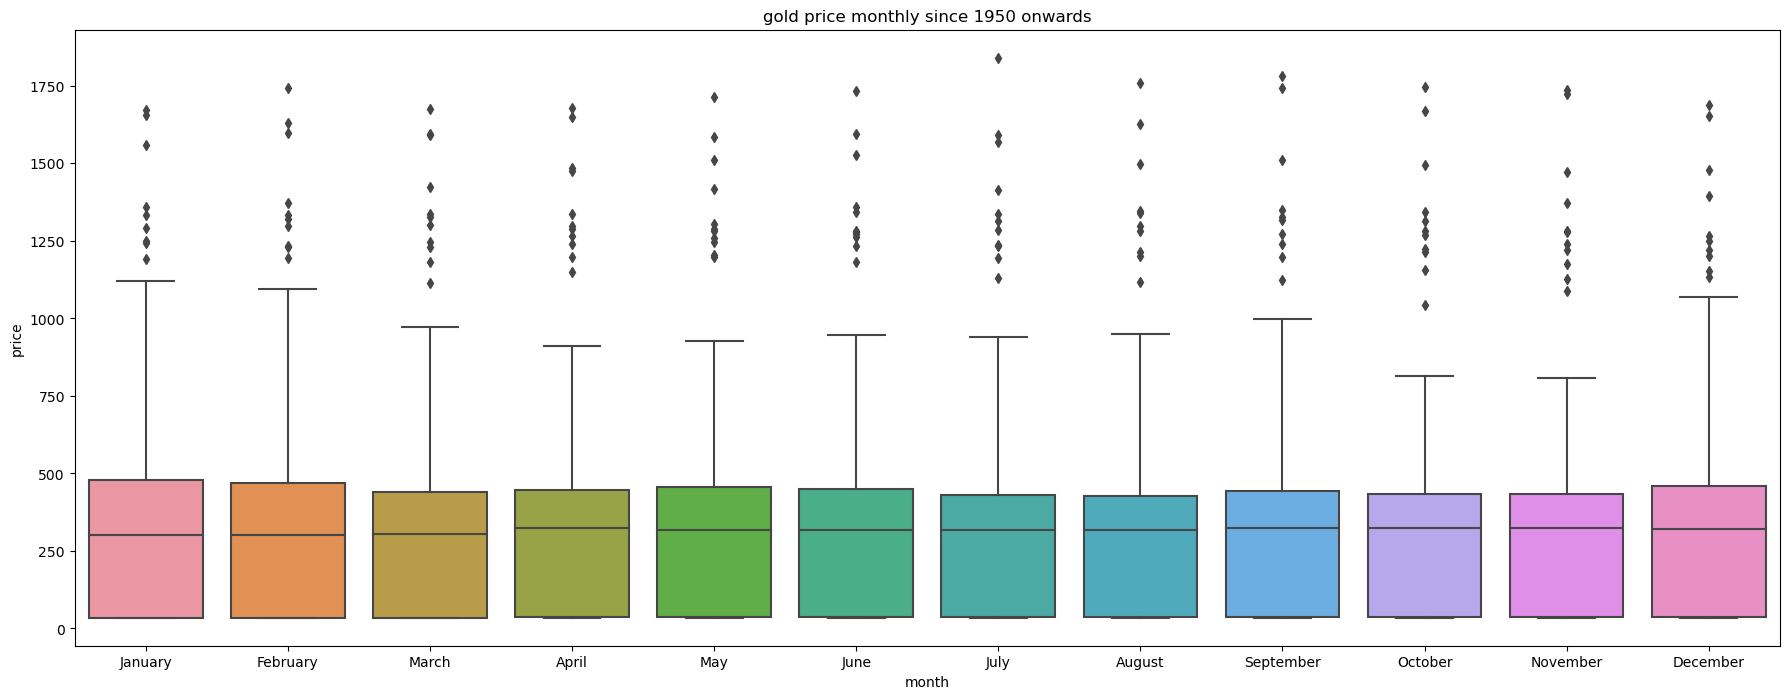

In [11]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0], ax = ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.show()



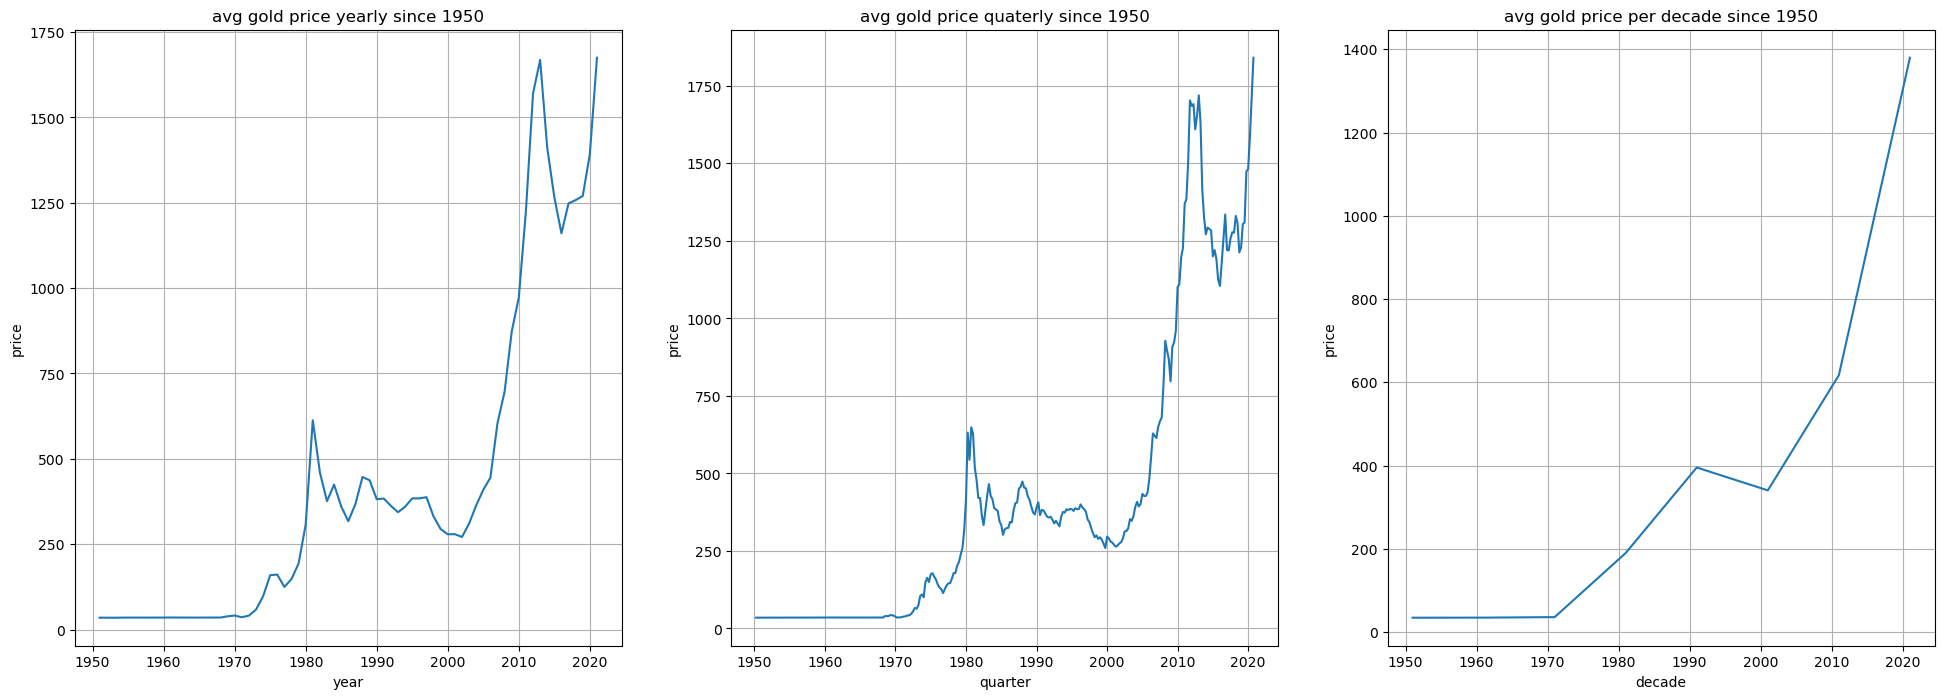

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize = (24,8))

df_annual_sum = df.resample('A').mean()
axes[0].plot(df_annual_sum)
axes[0].set_title("avg gold price yearly since 1950")
axes[0].set_xlabel('year')
axes[0].set_ylabel('price')
axes[0].grid()

df_quaterly_sum = df.resample('Q').mean()
axes[1].plot(df_quaterly_sum)
axes[1].set_title('avg gold price quaterly since 1950')
axes[1].set_xlabel('quarter')
axes[1].set_ylabel('price')
axes[1].grid()

df_decade_sum = df.resample('10Y').mean()
axes[2].plot(df_decade_sum)
axes[2].set_title('avg gold price per decade since 1950')
axes[2].set_xlabel('decade')
axes[2].set_ylabel('price')
axes[2].grid()



In [13]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price':'Std'}),left_index = True, right_index = True)
df_1['Cov_pct']= ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()



,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


For each year we retain the mean, standard deviation and coefficient of variation (not to be confused with covariance)

coefficient of variation : a proportional measure of standard deviation compare to the mean (std/mean)*100 

covariance : measures the direction of a relationship between two variables (positive covariance / negative covariance) depending on which direction two variables fluctuate 

correlation : measures both the strenght and direction between two variables, describes how a change in one variable leads to a change in percentage of the second variable. Correlation coefficient range from -1 to +1 with extreme values indicating strong relationships. 0 suggesting no linear link between two variables but another functional relationship may exist


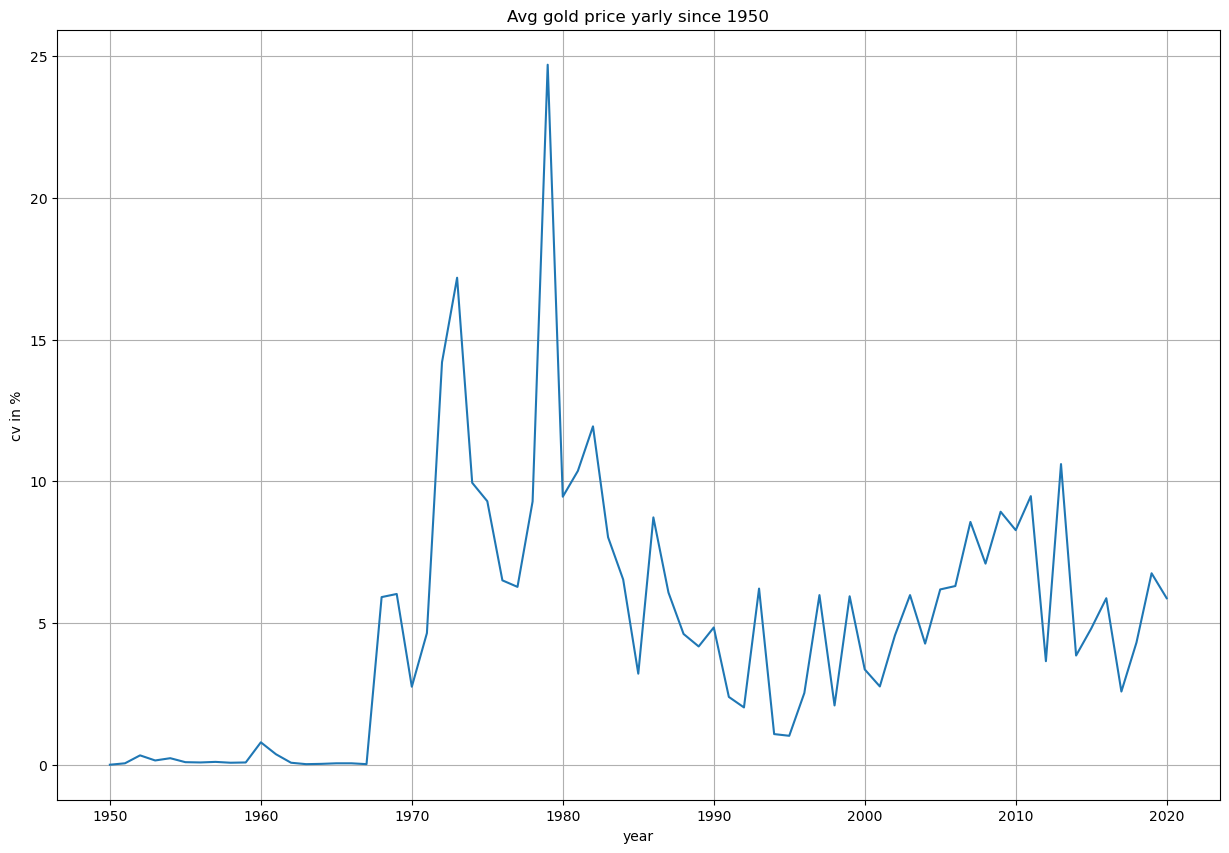

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
df_1['Cov_pct'].plot()

plt.title('Avg gold price yarly since 1950')
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()

Coefficient of variation reaches it's peak around 1978, which meant at this period in time the asset was highly risky/volatile. 
A lower coefficient of variation (CV) is generally associated with a lower risk. In finance, the CV is used to determine the risk-to-reward ratio nof an investment, where the volatility represents the risk and the mean represents the reward. 

A lower CV indicates a better risk-return tradeoff, with low volatility and high returns. Investors might compare the CV of a bond investment to a tock investment to determine which has a lower risk to return ratio. A high CV might be unacceptable to risk-averse investors. However, a lower CV might not be favourable if the average expected return is negative. 

Expected return Example: 
If an investment has a 50% chance of gaining 20% and 50% chance of losing 10%, the expected return would be 5% = (50% x 20% + 50% x -10% = 5%)

(We can assume the probability of a stock touching a given value assuming a geometric brownian motion model using montecarlo simulation)

* Investigate - (https://www.youtube.com/watch?v=yGlkRpqMDVk)
* Research Brownian motion - (https://www.youtube.com/watch?v=fIM_AQbBOm4)
* Investigate - Probability of stock being in certain price ranges (https://www.youtube.com/watch?v=Y2CURabE0yY&t=19s)

In [15]:
"Time Series forecasting"

train = df[df.index.year <= 2015]
test = df[df.index.year > 2015 ]

"We're taking all the data before 2015 as our training data and testing data will be the price of gold after 2015"

print('Training datapoints:' , train.shape[0])
print('Testing datapoints:' , test.shape[0])

Training datapoints: 792
Testing datapoints: 55


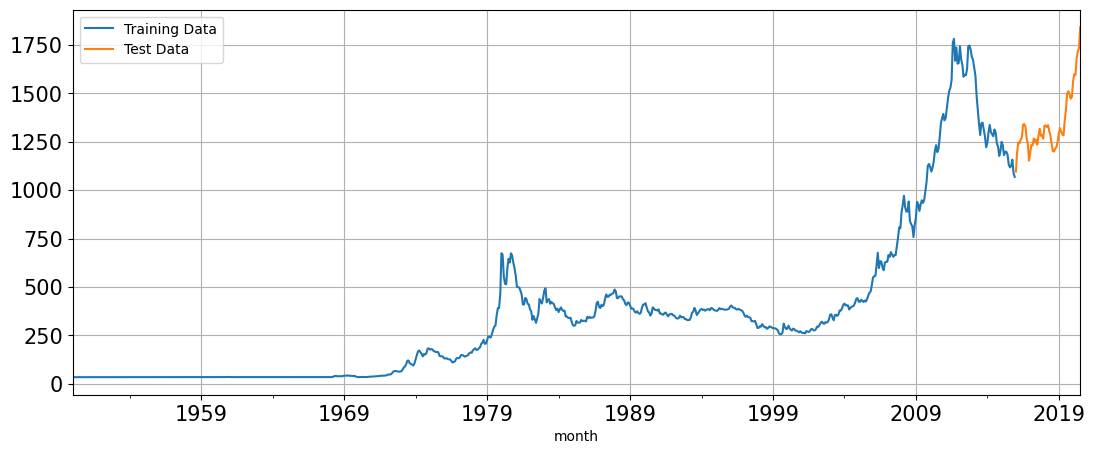

In [16]:
train['Price'].plot(figsize=(13,5),fontsize = 15)
test['Price'].plot(figsize=(13,5),fontsize = 15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()


We're creating 3 models Linear Regression & Naive & exponential smoothing

In [17]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [18]:
LR_train = train.copy()
LR_test = test.copy()

LR_train['time'] = train_time
LR_test['time'] = test_time

In [19]:
lr= LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

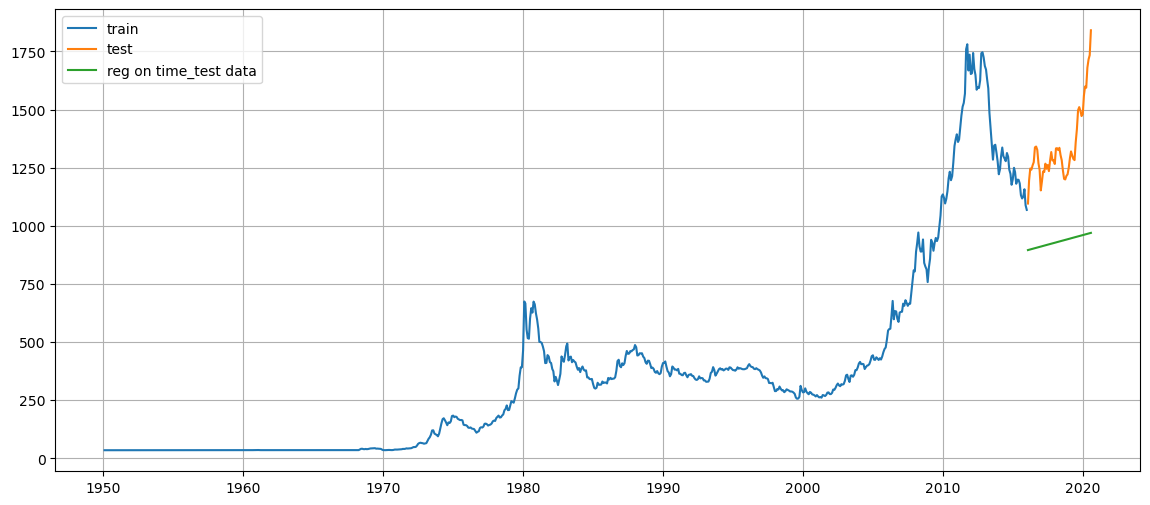

In [20]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'],label = 'train')
plt.plot(test['Price'],label = 'test')
plt.plot(LR_test['forecast'],label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid()

Mape - Measure of prediction accuracy in forecasting method of statistical model 
Also known as the mean absolute percentage deviation (MAPD)

In [21]:
def mape(actual,pred):
    return round((np.mean(abs(actual - pred)/actual))*100,2)

mape_model_test =mape(test['Price'].values,test_predictions_model1)
print("Mape is %3.3f"%(mape_model_test),"%")

Mape is 29.760 %


In [22]:
resultsDf_1 = pd.DataFrame({'Test Mape (%)' : [mape_model_test]}, index=['RegressionOnTime'])
resultsDf_1

,Test Mape (%)
RegressionOnTime,29.76


Naive Forecasting model

In [23]:
Naive_train = train.copy()
Naive_test = test.copy()
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price'])) -1]
Naive_test.head()
                                                

,Price,naive
month,,
2016-01-31,1095.655,1068.317
2016-02-29,1194.893,1068.317
2016-03-31,1246.312,1068.317
2016-04-30,1241.452,1068.317
2016-05-31,1259.755,1068.317


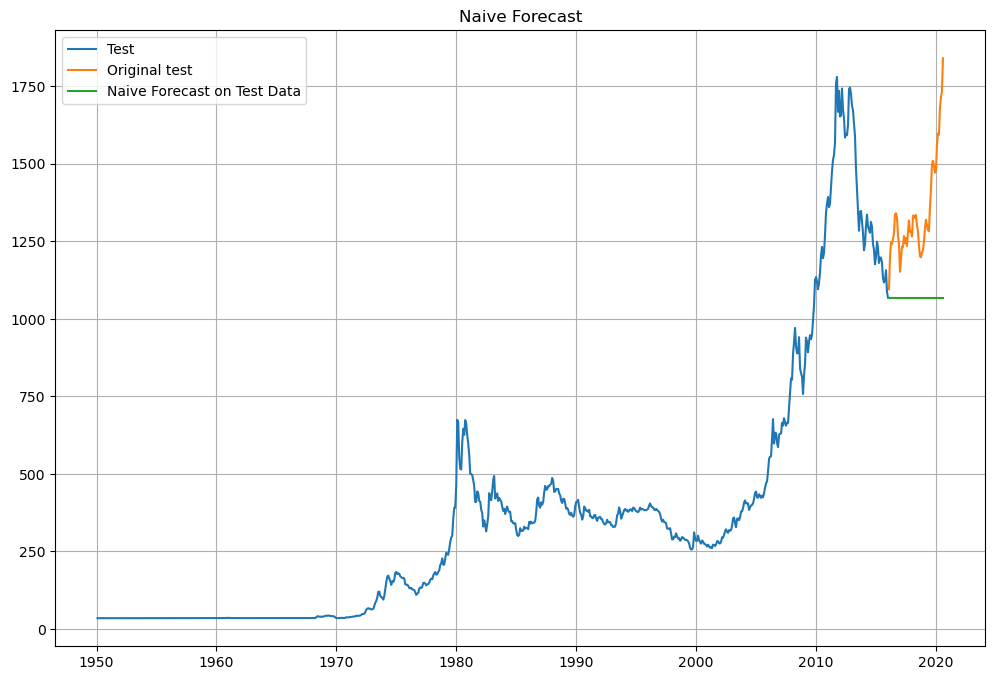

In [51]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label = 'Test')
plt.plot(test['Price'],label = 'Original test')
plt.plot(Naive_test['naive'], label = 'Naive Forecast on Test Data')
plt.legend(loc = 'best')
plt.title('Naive Forecast')
plt.grid()

In [25]:
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)
print("For Naive forecast on the Test Data, MAPE is %3.3f"%(mape_model2_test),"%")

For Naive forecast on the Test Data, MAPE is 19.380 %


In [26]:
resultsDf_2 = pd.DataFrame({'Test Mape (%)':[mape_model2_test]},index=['Naive_test'])
results = pd.concat([resultsDf_1, resultsDf_2])
results

,Test Mape (%)
RegressionOnTime,29.76
Naive_test,19.38


Exponential Smoothing

(ENSURE STATISTICAL ACCURACY OF FOLLOWING STEPS)
NAIVE DISTRIBUTION DOESN'T MAKE SENSE
BUT CAN WE use Naive as the foundational step to a baysian interferance for the Model 
( can we use Bayesian inference to find the likelihood of different models in a stock? )
https://towardsdatascience.com/how-to-use-bayesian-inference-for-predictions-in-python-4de5d0bc84f3


In [128]:
expon_train = train.copy()
expon_test = test.copy()

expon_train['Price'].values

expon_model_test = ExponentialSmoothing(endog=expon_train['Price'],trend = 'multiplicative',seasonal = 'multiplicative',seasonal_periods = 12).fit()

SyntaxError: keyword argument repeated: seasonal (1099288135.py, line 6)

Properties and types of series: 
- Trend - A long term increase or decrease in the data (a rough slope going through the data)
- Seasonality - A pattern observed in cycle of fixed frequency
- Cyclicity - a Cycle occurs when the data exhibits rises and falls that are not of a fixed frequency. (i.e. fluctuations due to economic conditions like a business cycle)
- Residuals - A time series can be decomposed of 2 parts a forecast (made up of several forecastd values) and residuals (the difference between an observation and it's predicted value at each step)


In [124]:
mape_model3_test = mape(expon_train['Price'].values,expon_model_test.fittedvalues)
print('MAPE:',mape_model3_test)

MAPE: 2.89


Things to Note
When we normalise a distribution to the normal distribution and want to find probality within the 95% Confidence interval(CI) we use P(-1.96 < z < 1.96) hence the two factors are included below 

DDof( Delta Degrees of Freedom)
When exploring a dataset taken from a sample of a population we consider degrees of freedom as the statistics we extract (Mean,std, skewness, kurtosis) are estimates on the population

* Descriptive Statistics (n -1 )
<br>Considering an example sample size 1 we can estimate a mean of the same value as our sample but we can't estimate a "spread" standard deviation as our degrees of freedom are (n-1) for standard deviation

* Regression (n - k - 1) [k = number of variables]

* Chi-Squared Test (r-1)(c-1) [r =rows, c = columns]
<br>Test used to compare the observed result with expected result (is the difference between observed data and expected data due to chance or due to relationship between variables? )



In [125]:
predictions = expon_model_test.forecast(steps=len(expon_test))
prediction_df = pd.DataFrame({'lower_CI':predictions - 1.96*np.std(expon_model_test.resid,ddof =1),
                              'prediction':predictions,
                              'upper_CI':predictions+ 1.96*np.std(expon_model_test.resid,ddof = 1)})

prediction_df.head()

,lower_CI,prediction,upper_CI
2016-01-31,1041.102741,1085.808797,1130.514853
2016-02-29,1057.269056,1101.975112,1146.681168
2016-03-31,1049.105920,1093.811976,1138.518031
2016-04-30,1042.676065,1087.382121,1132.088177
2016-05-31,1043.969403,1088.675459,1133.381514


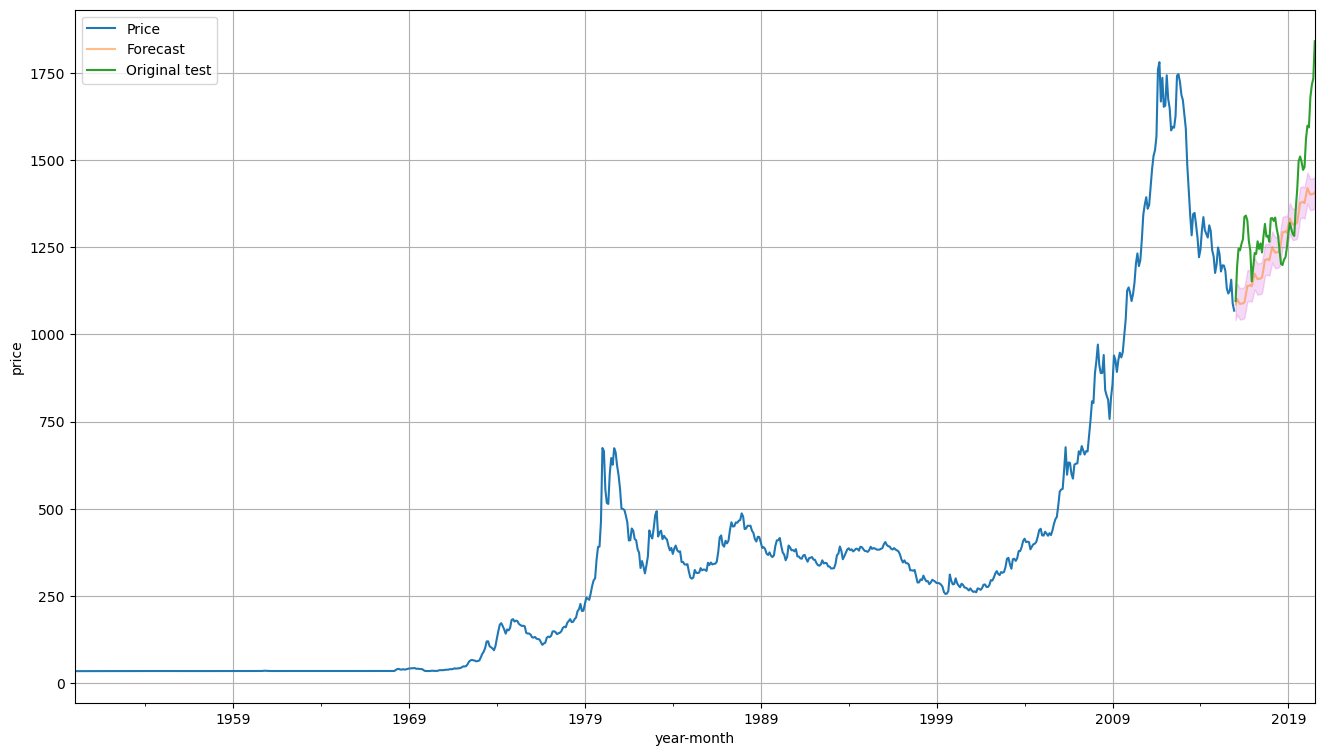

In [126]:
axis = expon_train.plot(label = 'Actual', figsize=(16,9))
prediction_df['prediction'].plot(ax = axis, label='Forecast', alpha = 0.5 )
test['Price'].plot(ax=axis,label = 'Original test')
axis.fill_between(prediction_df.index , prediction_df['lower_CI'],prediction_df['upper_CI'], color = 'm', alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()

THINGS TO POINT OUT THAT I THINK ARE ERROS: 
- Note: depending on type of trend "additive'/"mulitplicative" and seasonality you will get different results in the expectations of output, 
<br>i.e. since the end of the training data has a downard trent, "additive" provided us with a negative trend which we know not to be the case but "multiplicative" 
<br>trend had a positive trend, worth exploring definitive differences between the two 
- how do we find out the coefficients to use for the final  model (maybe finding the coefficients from an exponential line of best fit )


Objectives: 
- Understand the though process behind the set up for the last model 
- Investigate the the parameters used and understand smoothing python package 
- Look into best practises for utilising exponential smoothing for predicting stocks 
- Look into other examples of using differential exponential smoothing models 